In [492]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split


In [493]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [494]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [495]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [496]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [497]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [498]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [499]:
# Handling NaN values according to train data statistics
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mode()[0])
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

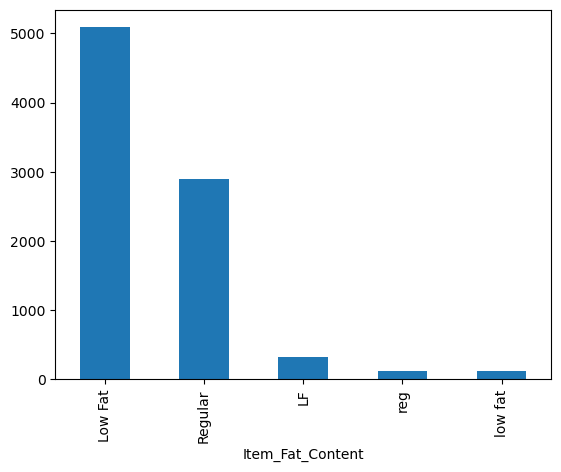

In [500]:
train['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.show()

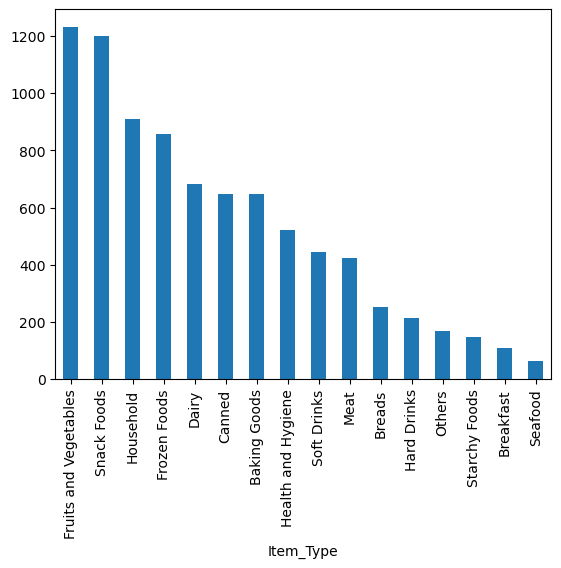

In [501]:
train['Item_Type'].value_counts().plot(kind='bar')
plt.show()

In [518]:
num_columns = train.select_dtypes(include=['float64','int64'])
corr = num_columns.corr()
corr.style.background_gradient(cmap= 'coolwarm')


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020952,-0.017843,0.025258,0.035689,0.012593
Item_Fat_Content,-0.020952,1.000000,0.047314,0.006063,0.003151,0.012314
Item_Visibility,-0.017843,0.047314,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.025258,0.006063,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,0.035689,0.003151,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.012593,0.012314,-0.192996,0.509886,0.077032,1.000000


In [503]:
dic = {'Low Fat': 0, 'LF': 0, 'low fat': 0, 'Regular': 1, 'reg': 1}
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(dic)
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(dic)

In [504]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [505]:
le_itemType = LabelEncoder()
train['Item_Type']= le_itemType.fit_transform(train['Item_Type'])
test['Item_Type']= le_itemType.transform(test['Item_Type'])

In [506]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [507]:
le_Outelt_Size = LabelEncoder()
train['Outlet_Size'] = le_Outelt_Size.fit_transform(train['Outlet_Size'])
test['Outlet_Size'] = le_Outelt_Size.transform(test['Outlet_Size'])

#train['Outlet_Size'] = train['Outlet_Size'].replace({'High': 2, 'Medium': 1, 'Small': 0})

In [508]:
le_Outelt_loc = LabelEncoder()
train['Outlet_Location_Type'] = le_Outelt_loc.fit_transform(train['Outlet_Location_Type'])
test['Outlet_Location_Type'] = le_Outelt_loc.transform(test['Outlet_Location_Type'])

In [509]:
le_Outelt_Type = LabelEncoder()
train['Outlet_Type'] = le_Outelt_Type.fit_transform(train['Outlet_Type'])
test['Outlet_Type'] = le_Outelt_Type.transform(test['Outlet_Type'])

In [510]:
train['Outlet_Type'].value_counts()

Outlet_Type
1    5577
0    1083
3     935
2     928
Name: count, dtype: int64

In [511]:
train.head(
    
)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


In [512]:
train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.352693,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.234540,0.477836,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.150000,0.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


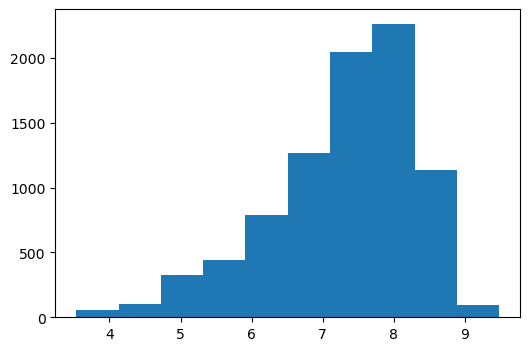

In [513]:
train['Item_Outlet_Sales'] = np.log1p(train['Item_Outlet_Sales'])

plt.figure(figsize= (6,4))
plt.hist(train['Item_Outlet_Sales'].values)
plt.show()

In [514]:
y = train['Item_Outlet_Sales']
X = train.drop(columns= ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42, shuffle= True)

In [515]:
poly = PolynomialFeatures(degree= 2)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [516]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [517]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression(fit_intercept= True)

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

err = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(err)

print(f' training score is: {train_score}')
print(f' testing score is: {test_score}')

0.522889498350556
 training score is: 0.7403990652009175
 testing score is: 0.7403018946086337
